In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from PIL import Image
import sys
sys.path.append("..")
import tensorflow as tf
from src.unet_models import MODELS
from src.tools import data_merger

In [2]:
dataset_type = 'train'
data_type = 'src'
noise_type = 'all'
dirs = ['noise_7e-3']

test_x = data_merger(dataset_type='test', data_type='src', noise_type=noise_type, dirs = ['noise_7e-3'])
test_y = data_merger(dataset_type='test', data_type='label', noise_type=noise_type, dirs = ['noise_7e-3'])

In [3]:
test_x.shape

(2700, 32, 32)

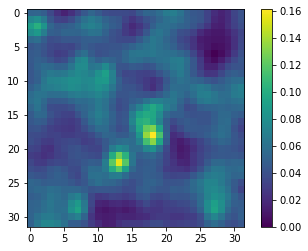

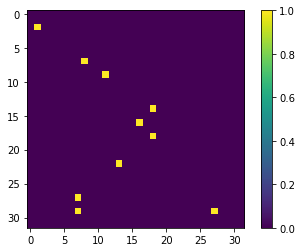

In [4]:
samp = np.random.randint(0,test_x.shape[0],1)[0]
plt.figure()
plt.imshow(test_x[samp])
plt.colorbar()

plt.figure()
plt.imshow(test_y[samp])
plt.colorbar()

In [11]:
model = tf.keras.models.load_model('../models/noise_7e-3/model-2.h5')
model.compile()

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [8]:
predictions = model.predict(test_x)

KeyboardInterrupt: 

In [ ]:
pred_y = predictions.reshape(predictions.shape[0],predictions.shape[1],predictions.shape[2])

In [ ]:
plt.figure(figsize=(30, 6))
#samp = np.random.randint(0,test_x.shape[0],1)[0]
samp = np.random.randint(0,900,1)[0]
plt.subplot(141)
plt.imshow(test_x[samp], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('counts')
plt.title('data')

plt.subplot(142)
plt.imshow(test_y[samp], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('counts')
plt.title('Label ({} sources)'.format(np.sum(test_y[samp])))

plt.subplot(143)
plt.imshow(predictions[samp], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('counts')
plt.title('Prediction ({:.2f} sources predicted)'.format(round(np.sum(predictions[samp]),2)))

plt.subplot(144)
p_y = predictions[samp].reshape(test_x.shape[1],test_x.shape[2])
plt.imshow(test_y[samp]-p_y, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('counts')
plt.title('Difference')

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('../plots/predictions_sources-{}.png'.format(samp))